O# Imports

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from itertools import combinations
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Load S&P

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

tables = pd.read_html(
    url,
    match="Symbol",
    storage_options={"User-Agent": "Mozilla/5.0"}
)

sp500 = tables[0]
# tickers = pd.DataFrame(sp500["Symbol"].tolist())
tickers = sp500["Symbol"].tolist()
tickers

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ADBE',
 'AMD',
 'AES',
 'AFL',
 'A',
 'APD',
 'ABNB',
 'AKAM',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'AON',
 'APA',
 'APO',
 'AAPL',
 'AMAT',
 'APP',
 'APTV',
 'ACGL',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'AXON',
 'BKR',
 'BALL',
 'BAC',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'TECH',
 'BIIB',
 'BLK',
 'BX',
 'XYZ',
 'BK',
 'BA',
 'BKNG',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'BLDR',
 'BG',
 'BXP',
 'CHRW',
 'CDNS',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'CCL',
 'CARR',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'COR',
 'CNC',
 'CNP',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'COIN',
 'CL',
 'CMCSA',
 'CAG',
 'COP',
 'ED',
 'STZ',
 'CEG',
 'COO',


In [4]:
data = yf.download(tickers, start="2020-01-01")["Close"]

/tmp/ipykernel_50450/563392968.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2020-01-01")["Close"]
[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
['BF.B']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2025-11-03)')
['BRK.B']: YFTzMissingError('possibly delisted; no timezone found')


In [5]:
data

Ticker,A,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,ADM,...,WY,WYNN,XEL,XOM,XYL,XYZ,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,82.545319,72.538498,69.823456,NaN,78.208046,41.268997,192.515015,334.429993,108.511086,39.126682,...,23.822412,138.703308,52.264378,54.131069,74.562317,63.830002,91.754837,138.316666,259.140015,127.514351
2020-01-03,81.219986,71.833282,69.160690,NaN,77.254601,41.221451,192.194382,331.809998,106.600899,39.050316,...,23.862938,136.645920,52.515739,53.695889,75.001205,63.000000,91.467453,137.955093,256.049988,127.533386
2020-01-06,81.460052,72.405693,69.706505,NaN,77.659363,41.383106,190.939346,333.709991,105.348457,38.744843,...,23.814302,136.375458,52.440331,54.108173,74.515625,62.570000,91.413574,137.157806,258.010010,126.554207
2020-01-07,81.709763,72.065155,69.308846,NaN,77.227631,41.040779,186.816956,333.390015,107.745209,38.278130,...,23.660301,137.022598,52.331402,53.665352,74.235504,64.589996,91.575203,137.037323,256.470001,126.982018
2020-01-08,82.516502,73.224426,69.800049,NaN,77.542435,40.631893,187.183395,337.869995,108.718300,37.853855,...,23.749458,137.882263,52.281143,52.856060,74.487617,67.599998,91.736862,138.678192,247.639999,126.706345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-28,145.850006,269.000000,227.539993,128.009995,126.610001,84.720001,253.350006,359.910004,239.350006,61.369999,...,23.740000,120.849998,79.820000,115.029999,150.500000,80.180000,141.089996,101.139999,274.309998,144.905457
2025-10-29,143.199997,269.700012,225.139999,126.480003,124.430000,85.849998,247.750000,337.859985,235.039993,60.520000,...,23.200001,120.870003,79.690002,116.449997,152.949997,76.510002,139.190002,99.709999,270.769989,143.440552
2025-10-30,143.360001,271.399994,228.199997,126.339996,124.669998,86.639999,249.250000,339.239990,232.899994,60.689999,...,23.510000,119.769997,81.589996,114.690002,151.529999,73.919998,139.059998,99.559998,261.369995,143.600006


In [6]:
data.to_csv("snp_data")

# Start Finding cointegrated pairs

PIf we iterate all possible combinations it gives

$$
\frac{503!}{2! \cdot 501!} = \frac{503 * 502}{2} = 126253
$$

Since we need to run computationally expensive EDF test to determine cointegration, it is suboptimal to just iterate all combinations



For this we firstly compute the correlation score for every pair, then filter out only large correlation values

## Correlation filtering

In [6]:
combinations_df = pd.DataFrame(combinations(data.columns, 2))

combinations_df.columns = ["stock1", "stock2"]

combinations_df

,stock1,stock2
0,A,AAPL
1,A,ABBV
2,A,ABNB
3,A,ABT
4,A,ACGL
...,...,...
126248,YUM,ZBRA
126249,YUM,ZTS
126250,ZBH,ZBRA
126251,ZBH,ZTS


In [7]:
combinations_df["cor"] = combinations_df.apply(lambda row: np.corrcoef(data[row["stock1"]], data[row["stock2"]])[0, 1], axis=1)

In [8]:
combinations_df

,stock1,stock2,cor
0,A,AAPL,0.509980
1,A,ABBV,0.414950
2,A,ABNB,NaN
3,A,ABT,0.561308
4,A,ACGL,0.312310
...,...,...,...
126248,YUM,ZBRA,0.068133
126249,YUM,ZTS,0.447703
126250,ZBH,ZBRA,0.461871
126251,ZBH,ZTS,0.148523


In [9]:
threshold = 0.95

candidates_df = combinations_df[combinations_df["cor"] > threshold]
candidates_df

,stock1,stock2,cor
1049,ABBV,AZO,0.971727
1077,ABBV,CB,0.959590
1105,ABBV,COR,0.957249
1196,ABBV,GD,0.954901
1300,ABBV,MCK,0.951755
...,...,...,...
126084,WELL,WMB,0.958548
126085,WELL,WMT,0.952076
126119,WM,WRB,0.953118
126133,WMB,WMT,0.951974


## ADF Test

In [10]:
def regression(s1, s2):
    X = data[s1].values
    y = data[s2].values

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    alpha, beta = model.params

    residuals = y - (alpha + beta * X[:,1])

    if np.isnan(residuals.any()):
        return np.nan

    adf_res = adfuller(residuals)

    return adf_res[0], adf_res[1], alpha, beta

In [11]:
candidates_df[["adf_stat", "p_val", "alpha", "beta"]] = candidates_df.apply(lambda row: pd.Series(regression(row["stock1"], row["stock2"])), axis=1)

/var/folders/cq/d7mdcwdd2f17y__yqfgbzc4r0000gn/T/ipykernel_72724/253938920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_df[["adf_stat", "p_val", "alpha", "beta"]] = candidates_df.apply(lambda row: pd.Series(regression(row["stock1"], row["stock2"])), axis=1)
/var/folders/cq/d7mdcwdd2f17y__yqfgbzc4r0000gn/T/ipykernel_72724/253938920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  candidates_df[["adf_stat", "p_val", "alpha", "beta"]] = candidates_df.apply(lambda row: pd.Series(regression(

In [12]:
candidates_df

,stock1,stock2,cor,adf_stat,p_val,alpha,beta
1049,ABBV,AZO,0.971727,-4.180216,0.000712,-413.037725,20.689363
1077,ABBV,CB,0.959590,-3.244302,0.017559,31.104269,1.291150
1105,ABBV,COR,0.957249,-3.637158,0.005089,-37.724488,1.557413
1196,ABBV,GD,0.954901,-4.165274,0.000754,43.014964,1.304206
1300,ABBV,MCK,0.951755,-3.724365,0.003783,-189.260205,4.277198
...,...,...,...,...,...,...,...
126084,WELL,WMB,0.958548,-3.133480,0.024173,-3.552641,0.403156
126085,WELL,WMT,0.952076,-3.738548,0.003602,7.702391,0.561833
126119,WM,WRB,0.953118,-2.455900,0.126576,-10.241779,0.330696
126133,WMB,WMT,0.951974,-2.513755,0.112163,14.453494,1.335677


In [13]:
selected_df = candidates_df[candidates_df.p_val < 0.005].sort_values(by="adf_stat", ascending=True)
selected_df

,stock1,stock2,cor,adf_stat,p_val,alpha,beta
90628,IBKR,RCL,0.965050,-5.424285,0.000003,-10.824950,5.194397
104992,MAR,PANW,0.967659,-5.346012,0.000004,-49.744881,0.883271
4197,ADI,HCA,0.957569,-5.282780,0.000006,-88.555544,2.000171
115258,ORLY,PWR,0.970683,-5.163362,0.000010,-79.770672,4.513938
30472,BLK,SYF,0.962842,-5.124787,0.000012,-15.691640,0.075377
...,...,...,...,...,...,...,...
122234,SO,WRB,0.952336,-3.646317,0.004935,-19.913734,0.962066
47807,COST,KKR,0.957740,-3.644637,0.004963,-15.159053,0.152811
110181,MSI,PEG,0.950675,-3.644358,0.004967,27.991784,0.117664
35695,CAT,VMC,0.964060,-3.643176,0.004987,60.390985,0.551520


## Test Viz

In [14]:
def plot_spread_by_idx(idx):
    for i in idx:
        stock1, stock2, alpha, beta = selected_df.iloc[i].loc[["stock1", "stock2", "alpha", "beta"]]

        s1_data, s2_data = data[stock1], data[stock2]

        spread = s1_data - (beta * s2_data)

        plt.figure(figsize = (16, 4))
        plt.plot(spread, label="Spread")
        # plt.plot(s1_data, label="Stock1")
        # plt.plot(s2_data, label="Stock2")

        plt.axhline(spread.mean(), linestyle="--", label="Mean", color="red")
        plt.legend()
        plt.title(f"Spread by {stock1} vs {stock2}")
        plt.show()

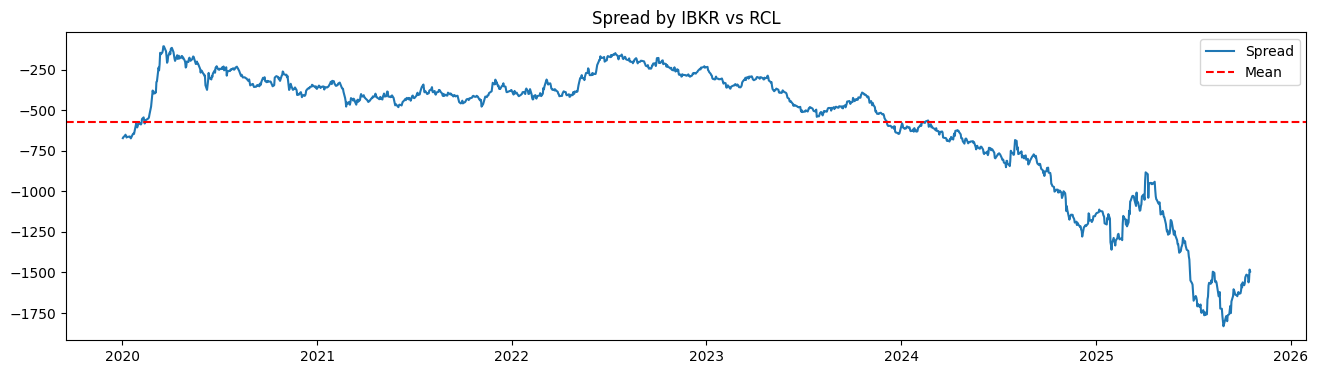

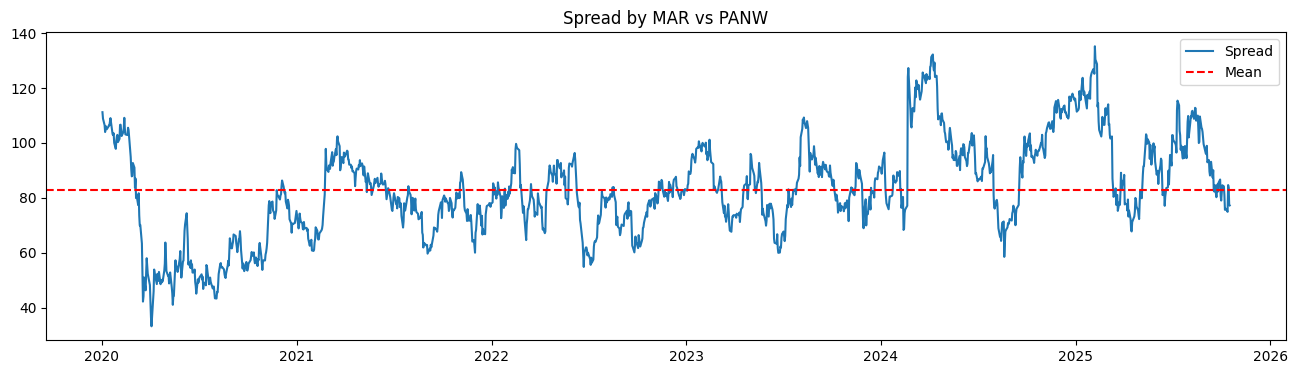

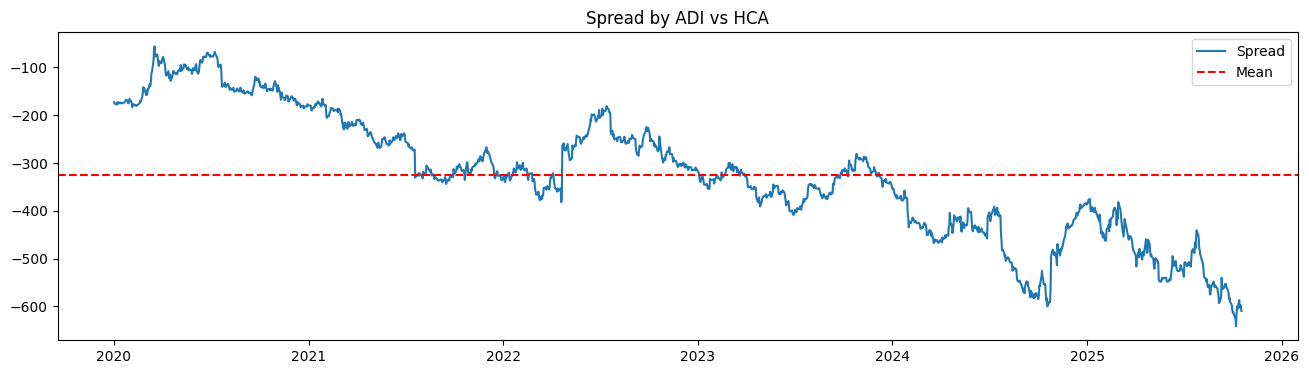

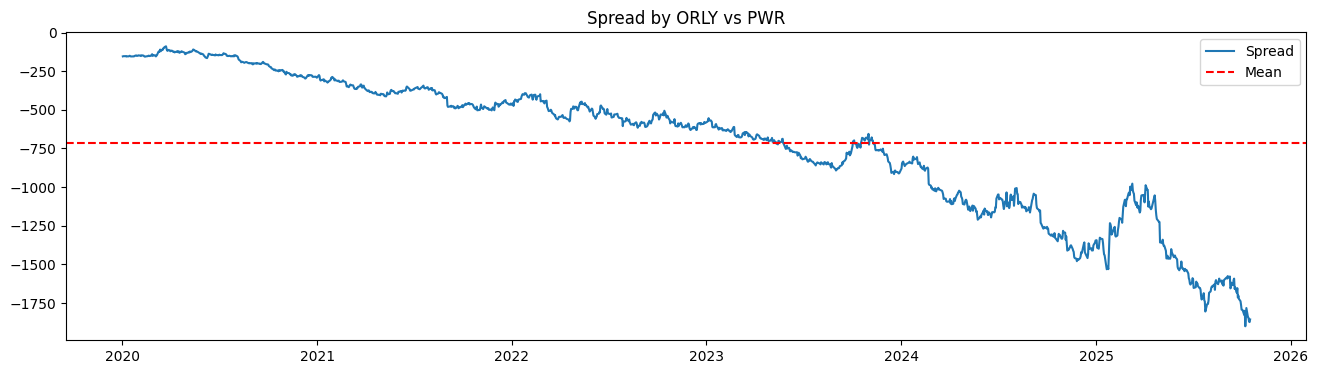

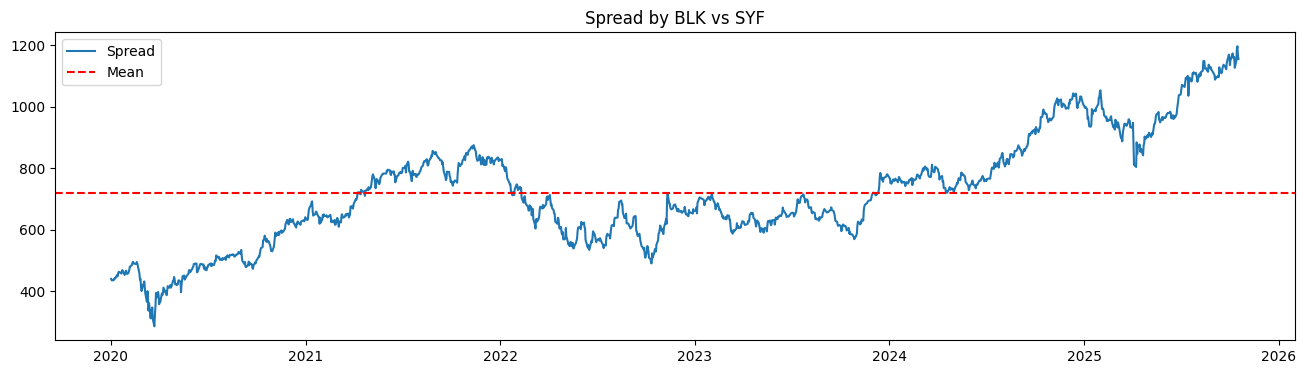

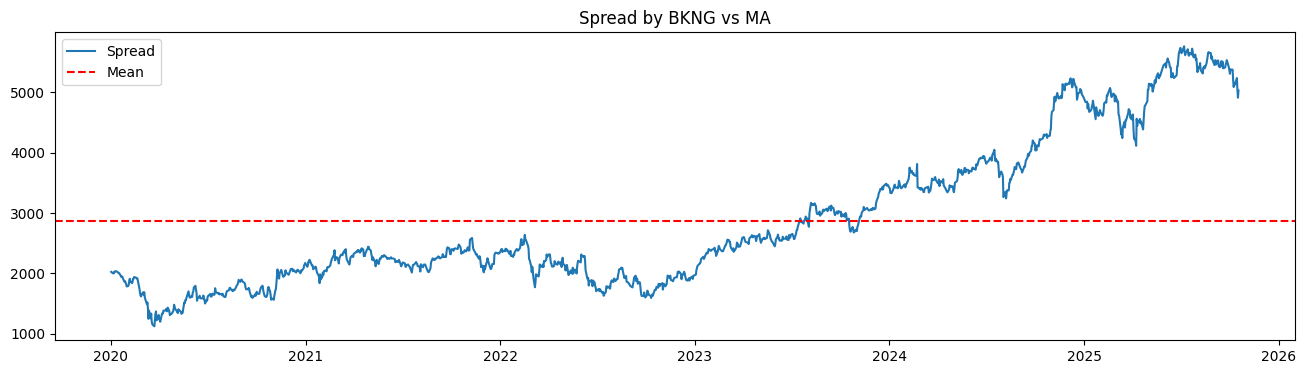

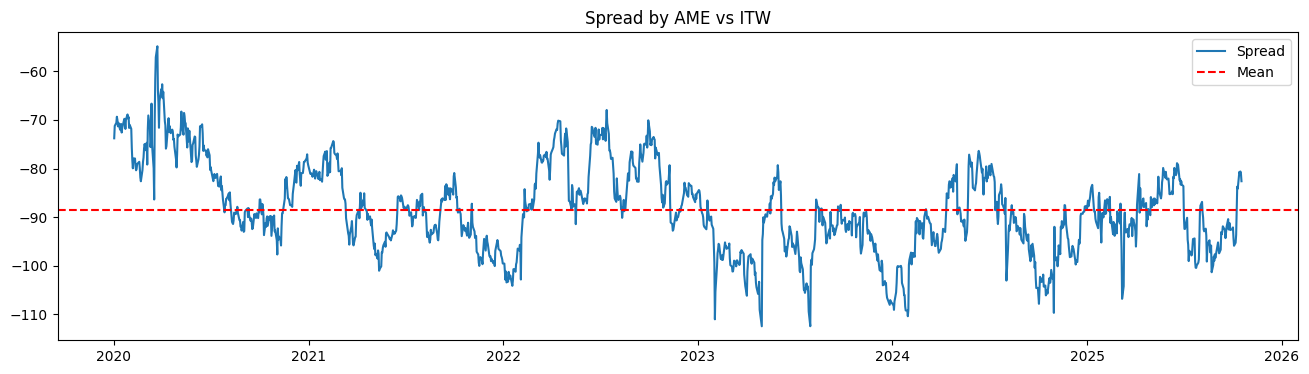

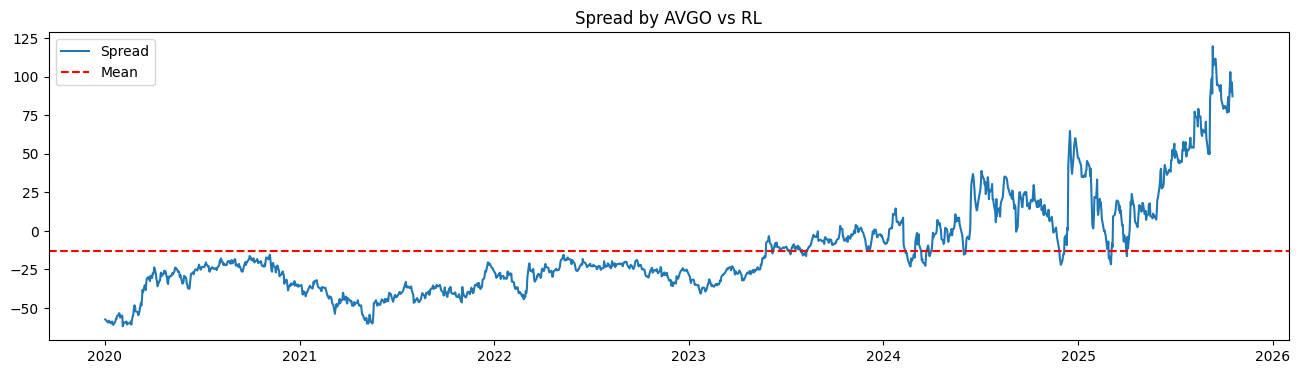

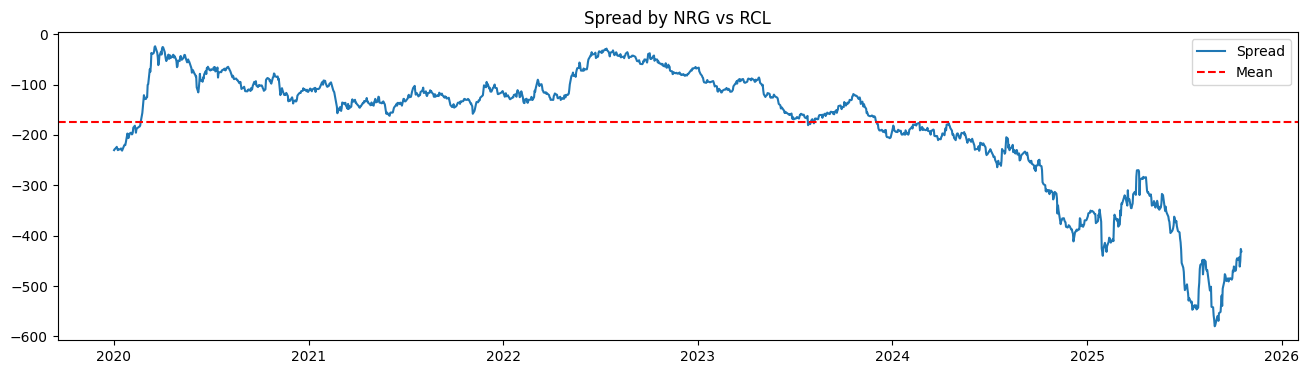

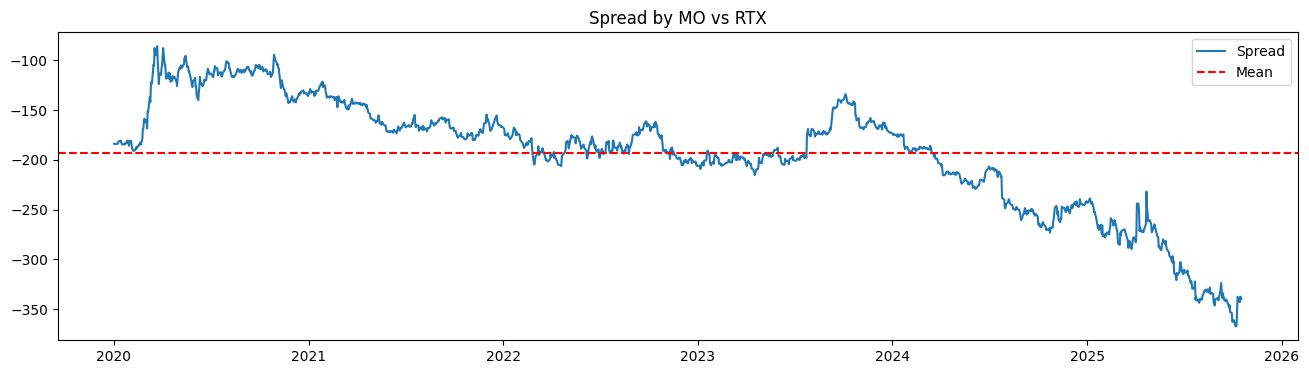

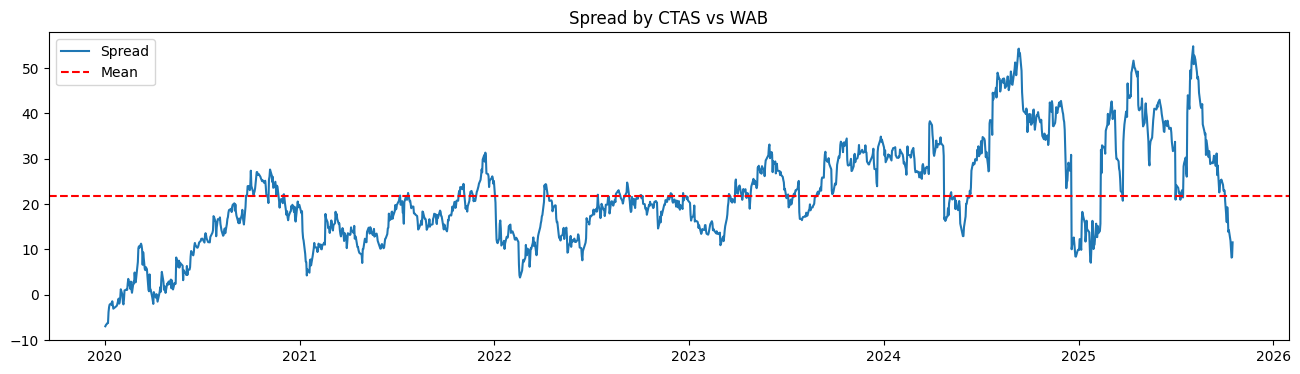

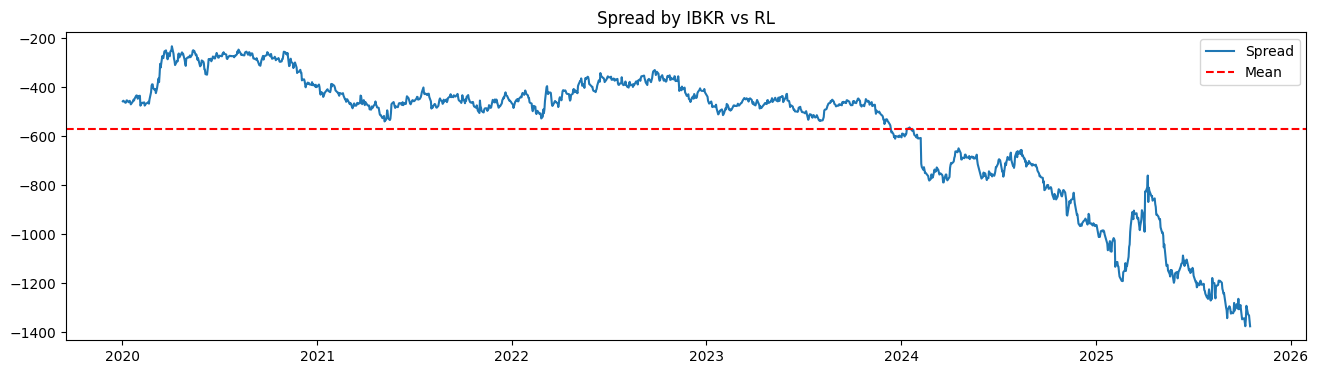

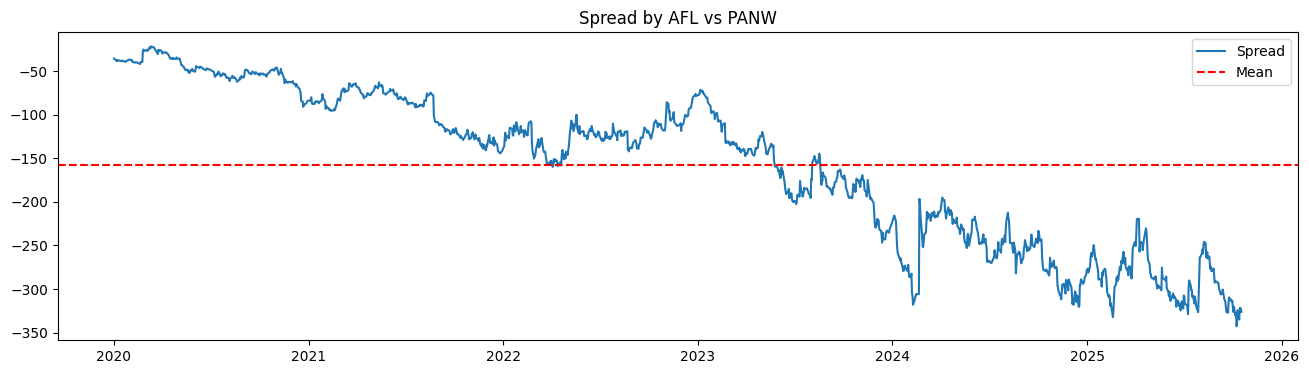

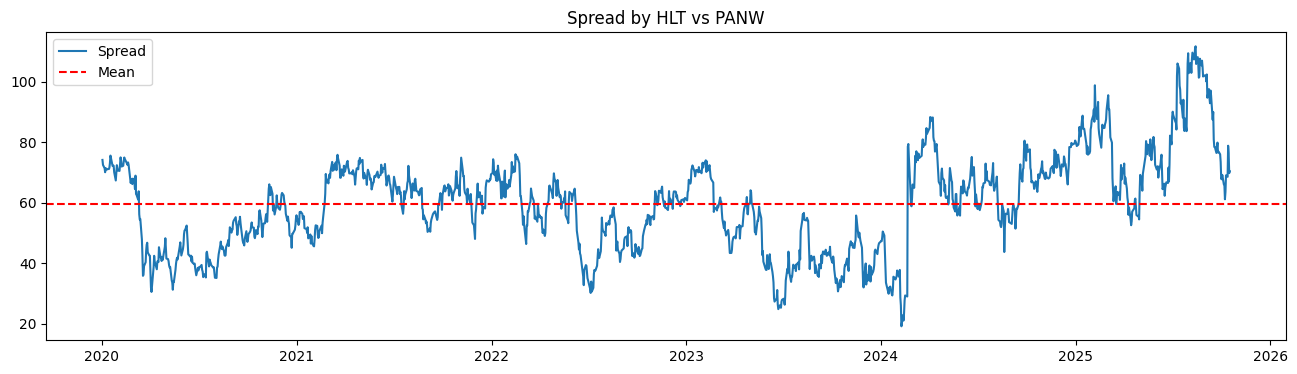

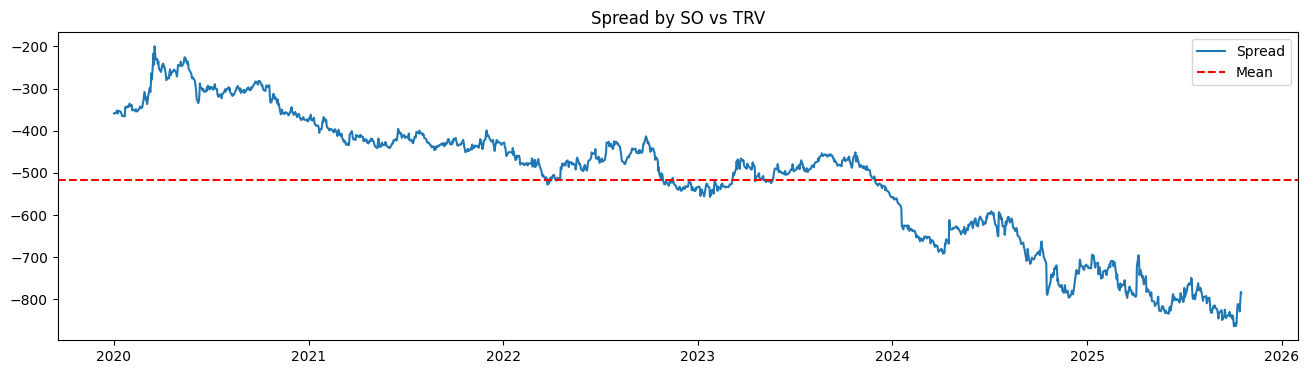

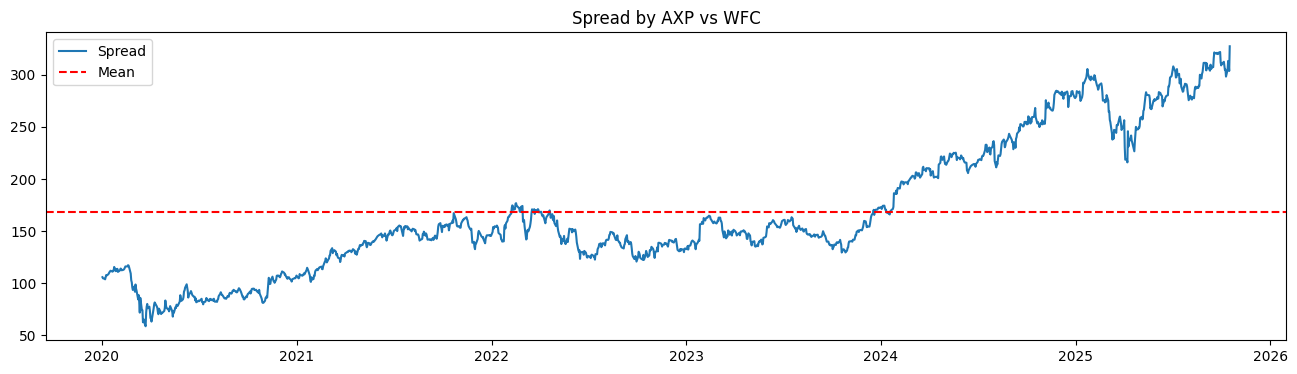

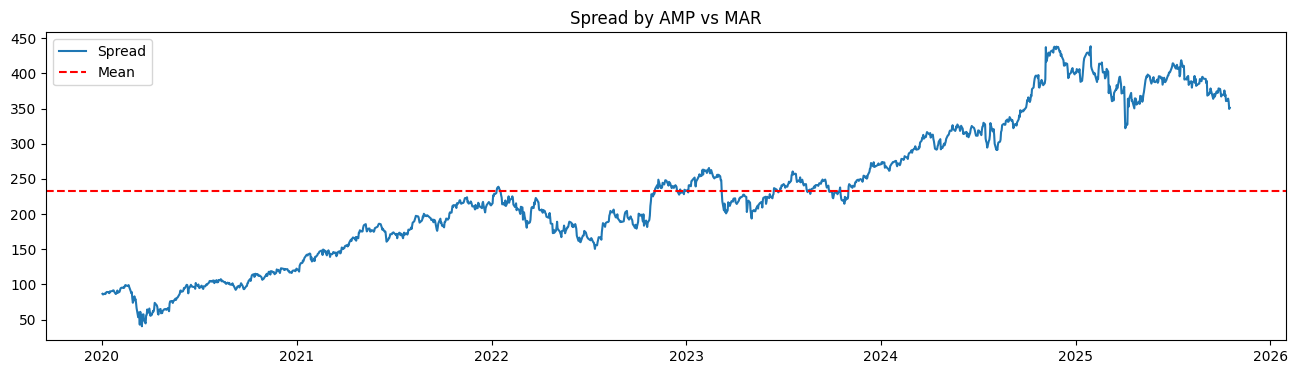

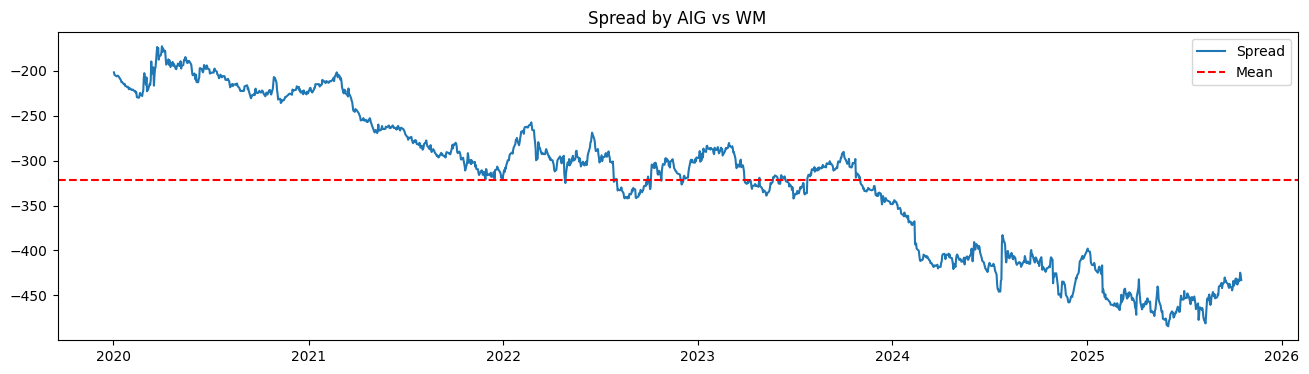

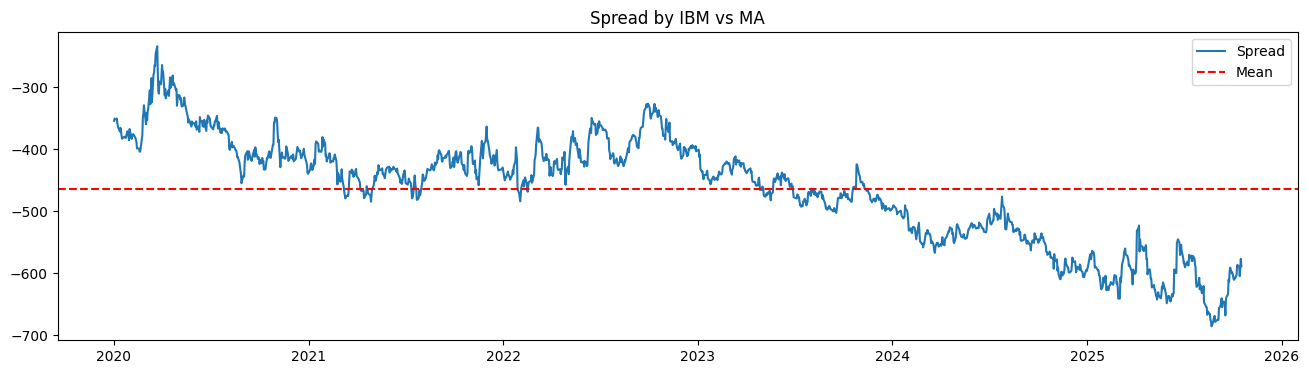

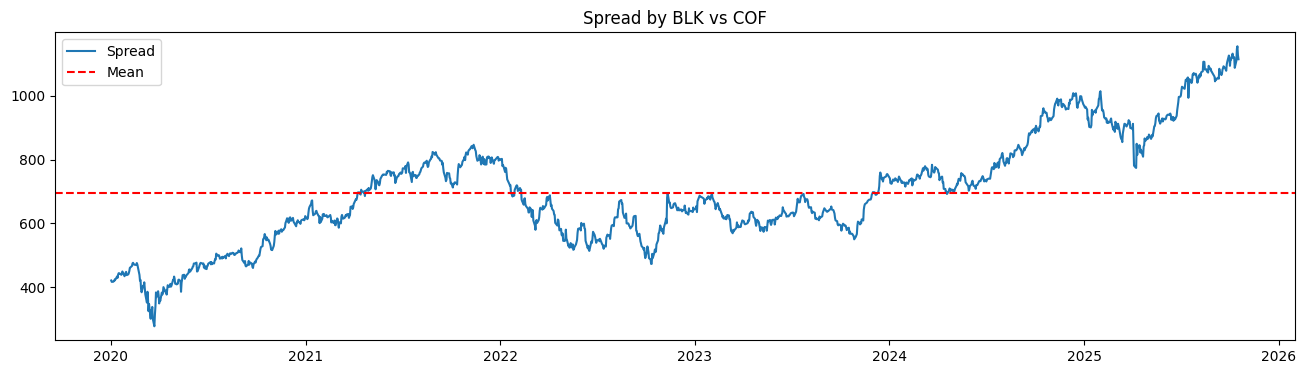

In [15]:
plot_spread_by_idx([i for i in range(20)])

In [122]:
selected_pairs = [
	("MAR","PANW"),
	("AVGO", "RCL"),
	("AME","ITW"),
	("HLT","PANW")
]

# Mean Revision

Try on one cointegrated pair

In [16]:
pair_data = pd.DataFrame([data["MAR"], data["PANW"]]).T

In [17]:
pair_data

,MAR,PANW
Date,,
2020-01-02,145.857468,39.235001
2020-01-03,143.719986,39.471668
2020-01-06,141.861771,40.043331
2020-01-07,139.551025,40.273335
2020-01-08,141.274429,39.761665
...,...,...
2025-10-13,263.260010,213.279999
2025-10-14,267.970001,207.559998
2025-10-15,266.190002,206.699997


In [18]:
pair_stats = candidates_df.query('stock1 == "MAR" and stock2 == "PANW"').copy()

beta = float(pair_stats["beta"])

beta

/var/folders/cq/d7mdcwdd2f17y__yqfgbzc4r0000gn/T/ipykernel_72724/2263043370.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  beta = float(pair_stats["beta"])


0.8832713811803483

In [19]:
spread = pair_data.MAR - beta * pair_data.PANW

spread

Date
2020-01-02    111.202314
2020-01-03    108.855791
2020-01-06    106.492642
2020-01-07    103.978742
2020-01-08    106.154088
                 ...    
2025-10-13     74.875891
2025-10-14     84.638195
2025-10-15     83.617811
2025-10-16     77.518912
2025-10-17     77.226719
Length: 1457, dtype: float64

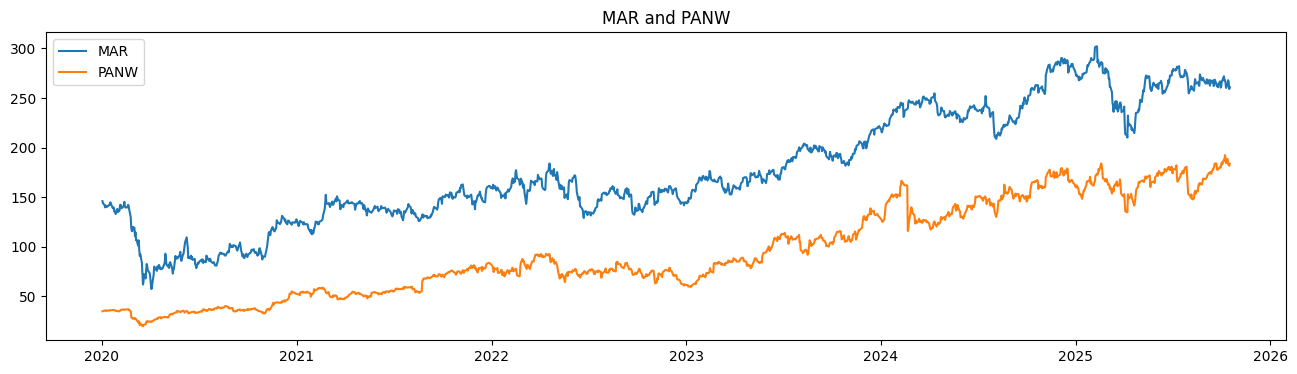

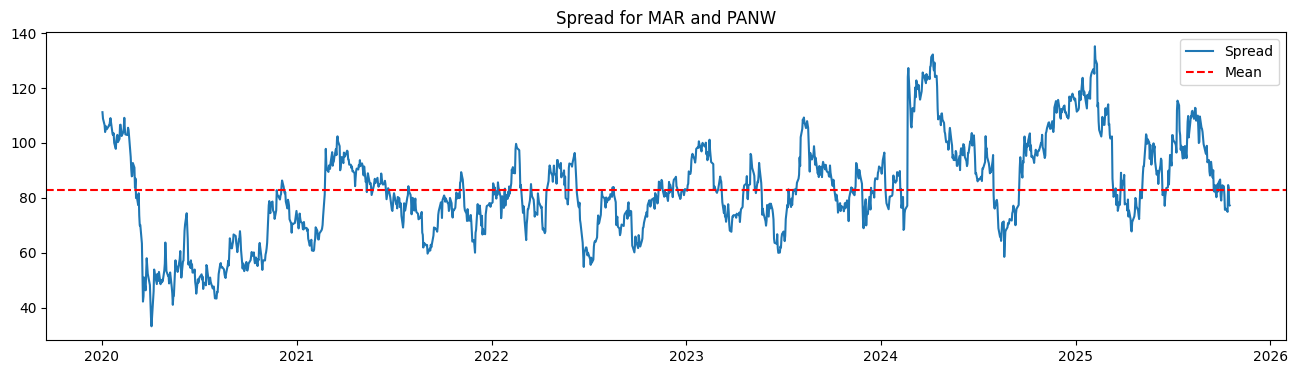

In [20]:
plt.figure(figsize = (16, 4))
plt.plot(pair_data["MAR"], label="MAR")
plt.plot(pair_data["PANW"] * beta, label="PANW")
plt.title("MAR and PANW")
plt.legend()
plt.show()

plt.figure(figsize = (16, 4))
plt.plot(spread, label="Spread")
plt.title("Spread for MAR and PANW")
plt.axhline(y=spread.mean(), linestyle="--", label="Mean", color="red")
plt.legend()
plt.show()

Now we have resolved the problem of not having stationary process, now the mean is crearly defined so we could apply mean revision model, in next sections we will define the parameters of when to execute trades to maximize the expected profit

and maybe if I will have time we will solve this model numerically

## Prepare spread

In [21]:
pair_data["spread"] = spread

In [22]:
pair_data

,MAR,PANW,spread
Date,,,
2020-01-02,145.857468,39.235001,111.202314
2020-01-03,143.719986,39.471668,108.855791
2020-01-06,141.861771,40.043331,106.492642
2020-01-07,139.551025,40.273335,103.978742
2020-01-08,141.274429,39.761665,106.154088
...,...,...,...
2025-10-13,263.260010,213.279999,74.875891
2025-10-14,267.970001,207.559998,84.638195
2025-10-15,266.190002,206.699997,83.617811


## Calculate Bollinger Bands (Test)

In [73]:
pair_data.drop(columns=["uband", "lband"], inplace=True)

In [68]:
pair_data["uband"] = pair_data["rm"] + 2 * pair_data["rstd"]
pair_data["lband"] = pair_data["rm"] - 2 * pair_data["rstd"]

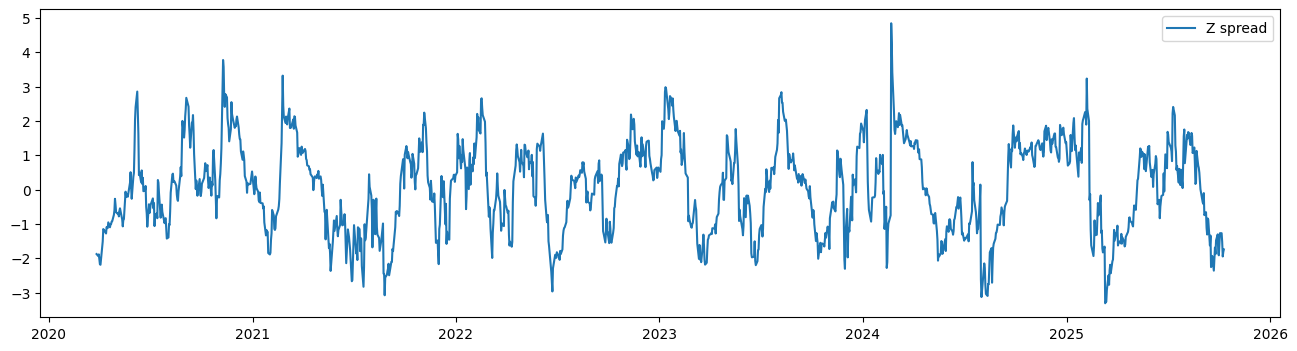

In [70]:
plt.figure(figsize = (16, 4))
plt.plot(pair_data["zspread"], label="Z spread")
plt.legend()
plt.show();

## Create train Test Split

### Estimate the reasonable window size by using half-life period

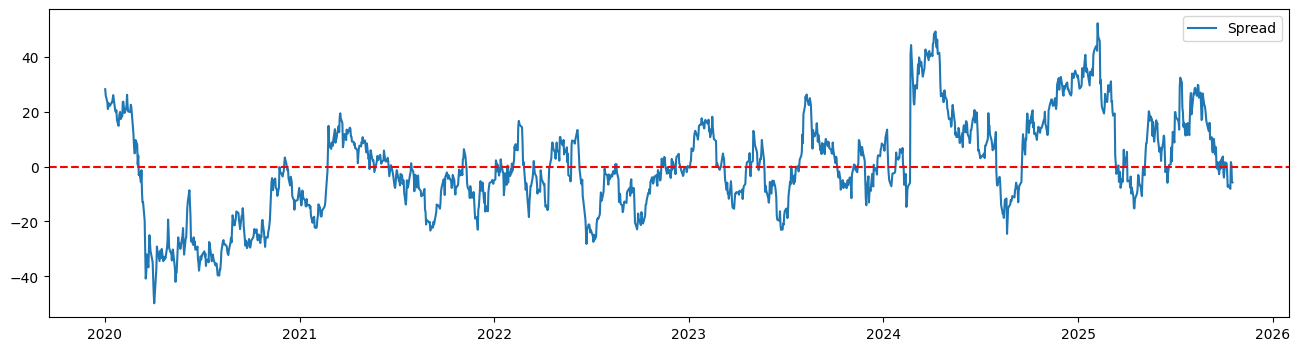

In [23]:
spread = pair_data["spread"] - pair_data["spread"].mean()

plt.figure(figsize = (16, 4))
plt.plot(spread, label="Spread")
plt.legend()
plt.axhline(y=spread.mean(), linestyle="--", label="Mean", color="red")
plt.show();

In [24]:
model = AutoReg(spread, lags=1, trend='n')

res = model.fit()

/Users/may/projects/21gtc/research/.venv/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [25]:
phi_hat = res.params["spread.L1"]

sigma2 = res.sigma2
sigma_hat = np.sqrt(sigma2)

In [26]:
T_half = np.log(0.5)/np.log(phi_hat)
T_half

np.float64(30.197863876634727)

So now the half-life is approximately 30 days, so then we could decided to

### Cut train/test

In [27]:
k_train=10
k_test=5
k_step=0.4

In [28]:
train_win = round(k_train*T_half)
test_win = round(k_test*T_half)
step_win = round(k_step*T_half)

In [29]:
win = 60

roll_mean = spread.rolling(win, min_periods = win).mean()
roll_std = spread.rolling(win, min_periods = win).std()

z = (spread - roll_mean) / roll_std
# z = z.dropna()

z

Date
2020-01-02         NaN
2020-01-03         NaN
2020-01-06         NaN
2020-01-07         NaN
2020-01-08         NaN
                ...   
2025-10-13   -1.760049
2025-10-14   -0.889479
2025-10-15   -0.949607
2025-10-16   -1.420969
2025-10-17   -1.397207
Name: spread, Length: 1457, dtype: float64

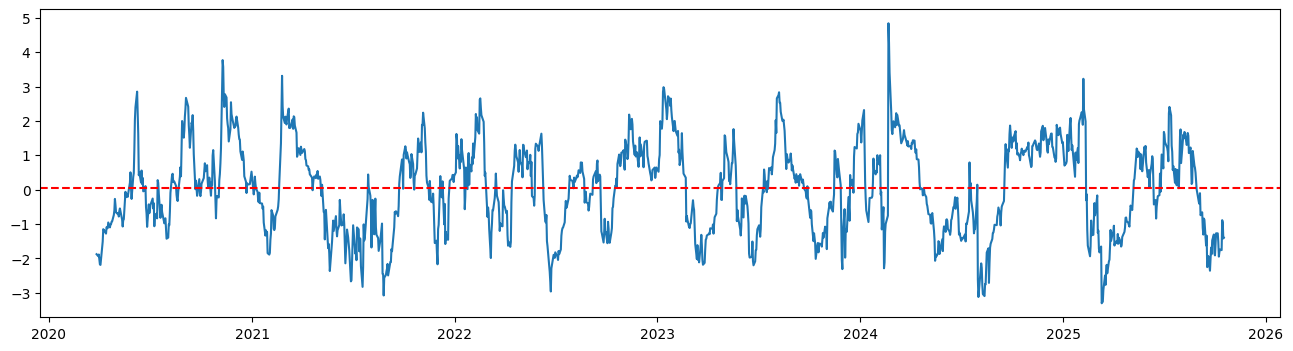

In [30]:
plt.figure(figsize = (16, 4))
plt.plot(z, label="Z spread")
plt.axhline(z.mean(), linestyle="--", label="Mean", color="red")

plt.show()

In [31]:
pair_data["zspread"] = z

pair_data["rm"] = roll_mean
pair_data["rstd"] = roll_std

# pair_data.dropna()

In [32]:
len(pair_data)

1457

In [33]:
win_z = 60

In [34]:
n = len(pair_data)
assert train_win > 0 and test_win > 0

win_z = win_z
start = win_z

gap_win = step_win
cur = start
windows = []

while True:
    # train
    train_start = cur
    train_end   = train_start + train_win
    if train_end > n: break
    windows.append({"type": "train", "start": train_start, "end": train_end})

    # test
    test_start = train_end + gap_win
    test_end   = test_start + test_win
    if test_end > n: break
    if (test_end - test_start) >= win_z:
        windows.append({"type": "test", "start": test_start, "end": test_end})

    cur = test_end + gap_win


In [35]:
windows[3]["end"] = 1163
windows[3]["type"] = "train"

In [36]:
windows[4]["end"] = len(pair_data)
windows[4]["start"] = 1180
windows[4]["type"] = "test"

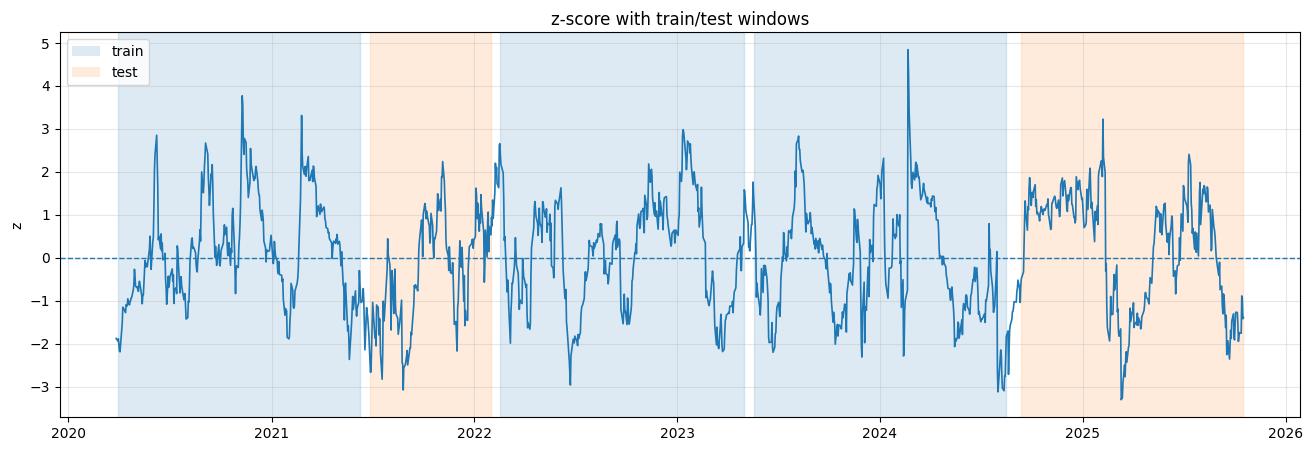

In [37]:
z = pair_data["zspread"]

fig, ax = plt.subplots(figsize=(16,5))
ax.plot(z.index, z.values, label="z-score", linewidth=1.2)
ax.axhline(0, linestyle="--", linewidth=1)

for w in windows:
    s, e = w["start"], w["end"]
    t0, t1 = z.index[s], z.index[e-1]
    color = "tab:blue" if w["type"]=="train" else "tab:orange"
    ax.axvspan(t0, t1, color=color, alpha=0.15)

legend_patches = [
    Patch(facecolor="tab:blue",  alpha=0.15, label="train"),
    Patch(facecolor="tab:orange",alpha=0.15, label="test"),
]
ax.legend(handles=[*legend_patches], loc="upper left")
ax.set_title("z-score with train/test windows")
ax.set_ylabel("z")
ax.grid(True, alpha=0.3)
plt.show()

In [38]:
pair_data

,MAR,PANW,spread,zspread,rm,rstd
Date,,,,,,
2020-01-02,145.857468,39.235001,111.202314,NaN,NaN,NaN
2020-01-03,143.719986,39.471668,108.855791,NaN,NaN,NaN
2020-01-06,141.861771,40.043331,106.492642,NaN,NaN,NaN
2020-01-07,139.551025,40.273335,103.978742,NaN,NaN,NaN
2020-01-08,141.274429,39.761665,106.154088,NaN,NaN,NaN
...,...,...,...,...,...,...
2025-10-13,263.260010,213.279999,74.875891,-1.760049,12.087099,11.479419
2025-10-14,267.970001,207.559998,84.638195,-0.889479,11.925714,11.558066
2025-10-15,266.190002,206.699997,83.617811,-0.949607,11.677344,11.639200


In [39]:
pair_stats

,stock1,stock2,cor,adf_stat,p_val,alpha,beta
104992,MAR,PANW,0.967659,-5.346012,0.000004,-49.744881,0.883271


a - b < 0

a < b

a is smaller then normal b is larger then normal

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def simulate_window(pair_data, beta, start, end, z_entry, z_exit, commission_bp=0, hold_max=None, verbose=False):
    """
    Simulate trades on a single window:
      enter long  if z < z_entry
      enter short if z > z_exit
      exit long   on z > 0
      exit short  on z < 0
    Returns:
      {
        'trades_df': pd.DataFrame,
        'summary': dict,
        'cum_pnl_curve': pd.Series
      }
    """
    def close_position(active_pos, price_close_s1, price_close_s2, commission=commission_bp):
        d_s1 = (price_close_s1 - active_pos["stock1"]) / active_pos["stock1"]
        d_s2 = (price_close_s2 - active_pos["stock2"]) / active_pos["stock2"]
        if active_pos["type"] == "long":
            profit = d_s1 * active_pos["num_stock1"] - d_s2 * active_pos["num_stock2"]
        else:
            profit = - d_s1 * active_pos["num_stock1"] + d_s2 * active_pos["num_stock2"]
        if verbose:
            print(f"[CLOSE {active_pos['type'].upper()}] {active_pos['time']} → {cur_time} | "
                  f"S1 {active_pos['stock1']:.4f}->{price_close_s1:.4f} | "
                  f"S2 {active_pos['stock2']:.4f}->{price_close_s2:.4f} | pnl={profit - commission:.6f}")
        return profit - commission, profit

    beta = float(beta)
    active_position = None
    trades = []
    cum_pnl = []
    cum = 0.0

    data = pair_data.iloc[start:end]

    for cur_time, row in data.iterrows():
        zscore = row["zspread"]
        s1 = row["MAR"]; s2 = row["PANW"]

        if active_position:
            if (active_position["type"] == "long" and zscore > 0) or (active_position["type"] == "short" and zscore < 0):
                pnl_net, pnl_gross = close_position(active_position, s1, s2, commission=commission_bp)
                trade = dict(
                    side      = active_position["type"],
                    t_in      = active_position["time"],
                    t_out     = cur_time,
                    z_in      = active_position["z_in"],
                    z_out     = zscore,
                    S1_in     = active_position["stock1"],
                    S1_out    = s1,
                    S2_in     = active_position["stock2"],
                    S2_out    = s2,
                    beta      = beta,
                    ret_s1    = (s1 / active_position["stock1"]) - 1.0,
                    ret_s2    = (s2 / active_position["stock2"]) - 1.0,
                    pnl_gross = pnl_gross,
                    pnl_net   = pnl_net,
                    bars_held = (data.index.get_loc(cur_time) - data.index.get_loc(active_position["time"]))
                )
                trades.append(trade)
                cum += pnl_net
                cum_pnl.append((cur_time, cum))
                active_position = None
                continue

        if not active_position:
            if zscore < z_entry:
                active_position = {
                    "type": "long",
                    "stock1": s1, "num_stock1": 1.0,
                    "stock2": s2, "num_stock2": beta,
                    "time": cur_time, "z_in": zscore
                }
                if verbose:
                    print(f"[OPEN  LONG ] {cur_time} | z={zscore:.3f} | S1={s1:.4f} S2={s2:.4f}")
            elif zscore > z_exit:
                active_position = {
                    "type": "short",
                    "stock1": s1, "num_stock1": 1.0,
                    "stock2": s2, "num_stock2": beta,
                    "time": cur_time, "z_in": zscore
                }
                if verbose:
                    print(f"[OPEN  SHORT] {cur_time} | z={zscore:.3f} | S1={s1:.4f} S2={s2:.4f}")

    trades_df = pd.DataFrame(trades) if trades else pd.DataFrame(
        columns=["side","t_in","t_out","z_in","z_out","S1_in","S1_out","S2_in","S2_out","beta","ret_s1","ret_s2","pnl_gross","pnl_net","bars_held"]
    )
    cum_pnl_curve = pd.Series([v for _, v in cum_pnl], index=[t for t, _ in cum_pnl]) if cum_pnl else pd.Series(dtype=float)

    n_trades = int(len(trades_df))
    pnl_sum  = float(trades_df["pnl_net"].sum()) if n_trades else 0.0
    hit_rate = float((trades_df["pnl_net"] > 0).mean()) if n_trades else np.nan
    pnl_mean = float(trades_df["pnl_net"].mean()) if n_trades else np.nan
    pnl_std  = float(trades_df["pnl_net"].std(ddof=1)) if n_trades > 1 else np.nan
    sharpe_pt = (pnl_mean / pnl_std) * np.sqrt(n_trades) if (n_trades > 1 and pnl_std and pnl_std > 0) else np.nan

    if len(cum_pnl_curve):
        cv = cum_pnl_curve.values
        peaks = np.maximum.accumulate(cv)
        maxdd = float((peaks - cv).max())
    else:
        maxdd = np.nan

    by_side = trades_df.groupby("side")["pnl_net"].agg(n="count", avg="mean", sum="sum").to_dict(orient="index") if n_trades else {}
    dur_mean = float(trades_df["bars_held"].mean()) if n_trades else np.nan
    dur_med  = float(trades_df["bars_held"].median()) if n_trades else np.nan

    summary = dict(
        n_trades=n_trades, pnl_sum=pnl_sum, hit_rate=hit_rate,
        pnl_mean=pnl_mean, pnl_std=pnl_std, sharpe_per_trade=sharpe_pt,
        maxdd=maxdd, duration_mean_bars=dur_mean, duration_median_bars=dur_med,
        by_side=by_side
    )
    return dict(trades_df=trades_df, summary=summary, cum_pnl_curve=cum_pnl_curve)


def run_experiment(pair_data, beta, windows, z_entry, z_exit, commission_bp=0, verbose=False):
    rows = []
    trades_all = []

    for wid, w in enumerate(windows):
        kind = w["type"]
        res = simulate_window(
            pair_data, beta, w["start"], w["end"],
            z_entry=z_entry, z_exit=z_exit,
            commission_bp=commission_bp, verbose=verbose
        )
        summ = res["summary"].copy()
        summ["window_id"] = wid
        summ["kind"] = kind
        summ["start"] = pair_data.index[w["start"]]
        summ["end"]   = pair_data.index[w["end"]-1]
        rows.append(summ)

        td = res["trades_df"].copy()
        td["window_id"] = wid
        td["kind"] = kind
        trades_all.append(td)

    windows_summary = pd.DataFrame(rows).sort_values(["window_id"]).reset_index(drop=True)
    trades_all = pd.concat(trades_all, ignore_index=True) if trades_all else pd.DataFrame(
        columns=["side","t_in","t_out","z_in","z_out","S1_in","S1_out","S2_in","S2_out","beta","ret_s1","ret_s2","pnl_gross","pnl_net","bars_held","window_id","kind"]
    )

    def agg_block(df):
        if df.empty:
            return dict(n_trades=0, pnl_sum=0.0, hit_rate=np.nan, sharpe_per_trade=np.nan, maxdd=np.nan)
        return dict(
            n_trades = int(df["n_trades"].sum()),
            pnl_sum  = float(df["pnl_sum"].sum()),
            hit_rate = float(
                (trades_all.loc[trades_all["kind"].isin(df["kind"]) if "kind" in df else slice(None), "pnl_net"] > 0).mean()
            ) if "kind" in df else float((trades_all["pnl_net"] > 0).mean()) if not trades_all.empty else np.nan,
            sharpe_per_trade = float(df["sharpe_per_trade"].mean(skipna=True)),
            maxdd = float(df["maxdd"].max(skipna=True))
        )

    train_sum = windows_summary[windows_summary["kind"]=="train"]
    test_sum  = windows_summary[windows_summary["kind"]=="test"]
    val_sum   = test_sum.tail(1)  # last test as validation

    aggregates = dict(
        train = agg_block(train_sum),
        test  = agg_block(test_sum),
        validation = agg_block(val_sum),
        overall = agg_block(windows_summary)
    )

    return dict(
        windows_summary=windows_summary,
        trades_all=trades_all,
        aggregates=aggregates
    )

def print_experiment_report(exp):
    ws = exp["windows_summary"].copy()
    ag = exp["aggregates"]

    cols = ["window_id","kind","start","end","n_trades","pnl_sum","hit_rate","sharpe_per_trade","maxdd","duration_mean_bars"]
    print("\n=== Windows summary ===")
    display(ws[cols])

    print("\n=== Aggregates ===")
    agg_df = pd.DataFrame(ag).T[["n_trades","pnl_sum","hit_rate","sharpe_per_trade","maxdd"]]
    display(agg_df)

    print("\n=== Trades head ===")
    display(exp["trades_all"].head(10))


In [41]:
beta = float(pair_stats["beta"].values[0])

# Convention: your thresholds are asymmetric: z_entry < 0 for long, z_exit > 0 for short.
exp = run_experiment(
    pair_data=pair_data,
    beta=beta,
    windows=windows,
    z_entry=-2.0,
    z_exit= 2.0,
    commission_bp=0,
    verbose=False
)

print_experiment_report(exp)


=== Windows summary ===


,window_id,kind,start,end,n_trades,pnl_sum,hit_rate,sharpe_per_trade,maxdd,duration_mean_bars
0,0,train,2020-03-30,2021-06-09,5,0.589933,1.000000,1.819320,0.000000,26.400
1,1,test,2021-06-28,2022-01-31,4,0.335136,1.000000,2.495744,0.000000,13.250
2,2,train,2022-02-17,2023-05-02,4,0.468182,1.000000,3.274353,0.000000,31.250
3,3,train,2023-05-19,2024-08-15,8,0.804107,1.000000,3.178725,0.000000,21.875
4,4,test,2024-09-11,2025-10-17,3,0.134574,0.666667,1.644067,0.006164,32.000



=== Aggregates ===


,n_trades,pnl_sum,hit_rate,sharpe_per_trade,maxdd
train,17.0,1.862223,1.000000,2.757466,0.000000
test,7.0,0.469710,0.857143,2.069906,0.006164
validation,3.0,0.134574,0.857143,1.644067,0.006164
overall,24.0,2.331932,0.958333,2.482442,0.006164



=== Trades head ===


,side,t_in,t_out,z_in,z_out,S1_in,S1_out,S2_in,S2_out,beta,ret_s1,ret_s2,pnl_gross,pnl_net,bars_held,window_id,kind
0,long,2020-04-01,2020-05-26,-2.031145,0.198821,66.845894,91.757233,27.309999,38.528332,0.883271,0.372668,0.410777,0.009840,0.009840,37,0,train
1,short,2020-06-04,2020-06-19,2.036270,-0.049165,101.327370,86.691833,37.781666,38.455002,0.883271,-0.144438,0.017822,0.160180,0.160180,11,0,train
2,short,2020-09-02,2020-09-24,2.127310,-0.179325,100.911690,88.306183,42.910000,39.665001,0.883271,-0.124916,-0.075623,0.058120,0.058120,15,0,train
3,short,2020-11-09,2020-12-22,3.770639,-0.098116,114.358208,122.052971,42.021667,62.009998,0.883271,0.067286,0.475667,0.352857,0.352857,30,0,train
4,short,2021-02-23,2021-04-20,2.395944,-0.017515,144.566940,137.239532,62.976665,60.000000,0.883271,-0.050685,-0.047266,0.008936,0.008936,39,0,train
5,long,2021-06-28,2021-07-29,-2.670652,0.440450,131.342758,142.952591,63.078335,66.500000,0.883271,0.088393,0.054245,0.040481,0.040481,22,1,test
6,long,2021-08-24,2021-09-23,-2.451733,0.162613,132.328796,144.914932,73.644997,80.525002,0.883271,0.095113,0.093421,0.012596,0.012596,21,1,test
7,short,2021-11-05,2021-11-16,2.239319,-0.295687,162.025177,148.859024,82.296669,87.523331,0.883271,-0.081260,0.063510,0.137356,0.137356,7,1,test
8,long,2021-12-01,2021-12-06,-2.173544,0.393364,137.751862,151.478699,88.026665,83.536667,0.883271,0.099649,-0.051007,0.144702,0.144702,3,1,test
9,short,2022-02-17,2022-02-28,2.377478,-0.460656,172.233322,164.470871,83.190002,99.041664,0.883271,-0.045069,0.190548,0.213375,0.213375,6,2,train


In [171]:
start = windows[0]["start"]
end = windows[0]["end"]

start, end

(60, 367)

In [175]:
zspread = pair_data["zspread"]

zspread.iloc[60]

np.float64(-1.937319062424148)

<Axes: xlabel='Date'>

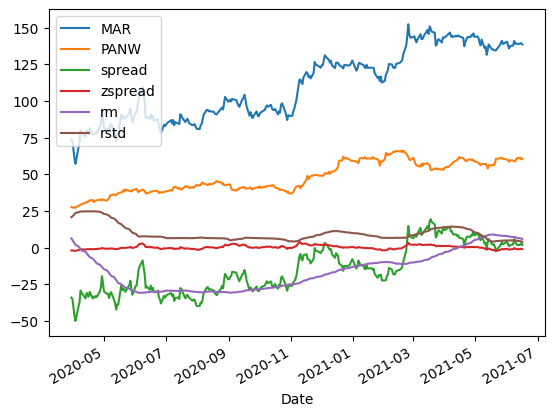

In [179]:
data = pair_data.iloc[start:end]

data.plot()